In [25]:
import pandas as pd #manipulacao e analise de dados
import seaborn as srn #visualizacao estatistica dos dados
import statistics as sts #funcoes de estatisticas

In [26]:
#importaremos o csv
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head() #visualizando a primeira parte da planilha


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [27]:
dataset.shape #visualizar tamanho, temos 14 linhas e 5 colunas

(14, 5)

In [28]:
#explorar dados categoricos (aparencia, vento, jogar)
agrupado = dataset.groupby(['Aparencia']).size() #ve o numero de ocorrencias de cada grupo
agrupado

#percebemos que há o menos

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

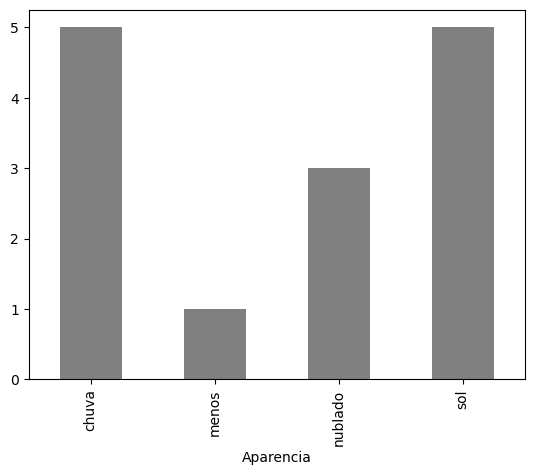

In [29]:
agrupado.plot.bar(color='gray')

In [17]:
#vamos colocar o menos no de maior ocorrencia que é o chuva ou sol
dataset.loc[dataset['Aparencia'] == 'menos','Aparencia'] = "sol"
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [19]:
#avaliar coluna de vento e vemos que esta normal
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [20]:
#avaliar coluna de vento e vemos que esta normal
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [22]:
#verificar NAN no dataset
dataset.isnull().sum() #tem no VENTO e UMIDADE

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [30]:
dataset['Vento'].isnull().sum()

1

In [33]:
dataset['Vento'].fillna('FALSO', inplace=True)

In [35]:
dataset['Vento'].isnull().sum()
#avaliar coluna de vento e vemos que esta normal
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [36]:
#explorar NUMERICAS
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

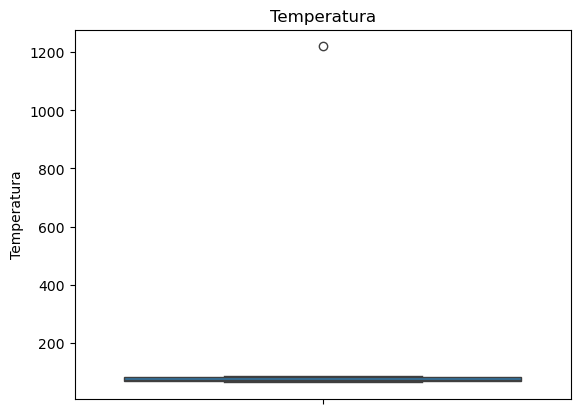

In [38]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [43]:
#visualizar fora do domínio proposto
dataset.loc[(dataset['Temperatura'] < -130 ) | ( dataset['Temperatura'] > 130 )]

mediana = sts.median(dataset['Temperatura'])
mediana

#substituir
dataset.loc[(dataset['Temperatura'] < -130 ) | ( dataset['Temperatura'] > 130 ), 'Temperatura'] = mediana

dataset.loc[(dataset['Temperatura'] < -130 ) | ( dataset['Temperatura'] > 130 )]


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [44]:
#visualizar umidade
#explorar NUMERICAS
dataset['Umidade'].describe()

count     13.000000
mean      88.115385
std       34.782751
min       65.000000
25%       70.000000
50%       80.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [51]:
#mediana da umidade

mediana = sts.median(dataset['Umidade'])
mediana


81.25

In [55]:
dataset['Umidade'] =  dataset['Umidade'].fillna(mediana)
dataset['Umidade'].isnull().sum()

0

In [57]:
dataset.loc[(dataset['Umidade'] < 0 ) | ( dataset['Umidade'] > 100)]

#mediana da umidade

mediana = sts.median(dataset['Umidade'])
mediana

dataset.loc[(dataset['Umidade'] < 0 ) | ( dataset['Umidade'] > 100), 'Umidade'] = mediana

dataset.loc[(dataset['Umidade'] < 0 ) | ( dataset['Umidade'] > 100)]


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [58]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,82.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
